DATA VISUALIZATION ON COVID SPREAD IN INDIA

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing 
import warnings
warnings.filterwarnings('ignore')
data=pd.read_csv('D:\\DATASCIENCE\\data\\covid_19_india.csv')
data.head(10)

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3
4,5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3
5,6,2020-02-04,6:00 PM,Kerala,3,0,0,0,3
6,7,2020-02-05,6:00 PM,Kerala,3,0,0,0,3
7,8,2020-02-06,6:00 PM,Kerala,3,0,0,0,3
8,9,2020-02-07,6:00 PM,Kerala,3,0,0,0,3
9,10,2020-02-08,6:00 PM,Kerala,3,0,0,0,3


In [3]:
data.describe()

,Sno,Cured,Deaths,Confirmed
count,18110.000000,1.811000e+04,18110.000000,1.811000e+04
mean,9055.500000,2.786375e+05,4052.402264,3.010314e+05
std,5228.051023,6.148909e+05,10919.076411,6.561489e+05
min,1.000000,0.000000e+00,0.000000,0.000000e+00
25%,4528.250000,3.360250e+03,32.000000,4.376750e+03
50%,9055.500000,3.336400e+04,588.000000,3.977350e+04
75%,13582.750000,2.788698e+05,3643.750000,3.001498e+05
max,18110.000000,6.159676e+06,134201.000000,6.363442e+06


In [3]:
#Check if there is any missing values or outliers in the dataset
df =data.isna().sum()
df

Sno                         0
Date                        0
Time                        0
State/UnionTerritory        0
ConfirmedIndianNational     0
ConfirmedForeignNational    0
Cured                       0
Deaths                      0
Confirmed                   0
dtype: int64

In [8]:
data.dtypes

Sno                          int64
Date                        object
Time                        object
State/UnionTerritory        object
ConfirmedIndianNational     object
ConfirmedForeignNational    object
Cured                        int64
Deaths                       int64
Confirmed                    int64
dtype: object

In [9]:
data.count() 

Sno                         18110
Date                        18110
Time                        18110
State/UnionTerritory        18110
ConfirmedIndianNational     18110
ConfirmedForeignNational    18110
Cured                       18110
Deaths                      18110
Confirmed                   18110
dtype: int64

In [10]:
# finding duplicate rows
duplicate_rows_data = data[data.duplicated()]
print("number of duplicate rows: ", duplicate_rows_data.shape)

number of duplicate rows:  (0, 9)


In [12]:
data.groupby('State/UnionTerritory').sum().head(10)

,Sno,Cured,Deaths,Confirmed
State/UnionTerritory,,,,
Andaman and Nicobar Islands,4580097,1848286,27136,1938498
Andhra Pradesh,4583300,370426530,2939367,392432753
Arunachal Pradesh,4577248,6588149,26799,7176907
Assam,4578837,92678680,638323,99837011
Bihar,4551446,125122902,1093466,132231166
Bihar****,31730,1402468,18881,1430909
Cases being reassigned to states,191339,0,0,345565
Chandigarh,4584478,10117035,147694,10858627
Chhattisgarh,4584879,151609364,2063920,163776262


In [12]:
#droping duplicate rows 
data = data.drop_duplicates()
data.head(9)

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3
4,5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3
5,6,2020-02-04,6:00 PM,Kerala,3,0,0,0,3
6,7,2020-02-05,6:00 PM,Kerala,3,0,0,0,3
7,8,2020-02-06,6:00 PM,Kerala,3,0,0,0,3
8,9,2020-02-07,6:00 PM,Kerala,3,0,0,0,3


In [13]:
#Display the last 5 entries
data.tail(5)

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
18105,18106,2021-08-11,8:00 AM,Telangana,-,-,638410,3831,650353
18106,18107,2021-08-11,8:00 AM,Tripura,-,-,77811,773,80660
18107,18108,2021-08-11,8:00 AM,Uttarakhand,-,-,334650,7368,342462
18108,18109,2021-08-11,8:00 AM,Uttar Pradesh,-,-,1685492,22775,1708812
18109,18110,2021-08-11,8:00 AM,West Bengal,-,-,1506532,18252,1534999


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18110 entries, 0 to 18109
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Sno                       18110 non-null  int64 
 1   Date                      18110 non-null  object
 2   Time                      18110 non-null  object
 3   State/UnionTerritory      18110 non-null  object
 4   ConfirmedIndianNational   18110 non-null  object
 5   ConfirmedForeignNational  18110 non-null  object
 6   Cured                     18110 non-null  int64 
 7   Deaths                    18110 non-null  int64 
 8   Confirmed                 18110 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 1.2+ MB


In [11]:
data.groupby('State/UnionTerritory').head(10)

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3
4,5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3
...,...,...,...,...,...,...,...,...,...
15882,15883,2021-06-11,8:00 AM,Bihar****,-,-,701234,9452,715730
17049,17050,2021-07-13,8:00 AM,Madhya Pradesh***,-,-,780735,10506,791656
17294,17295,2021-07-20,8:00 AM,Himanchal Pradesh,-,-,200040,3507,204516
17297,17298,2021-07-20,8:00 AM,Karanataka,-,-,2821491,36197,2885238


In [10]:
data.groupby('State/UnionTerritory').sum().head(20)

,Sno,Cured,Deaths,Confirmed
State/UnionTerritory,,,,
Andaman and Nicobar Islands,4580097,1848286,27136,1938498
Andhra Pradesh,4583300,370426530,2939367,392432753
Arunachal Pradesh,4577248,6588149,26799,7176907
Assam,4578837,92678680,638323,99837011
Bihar,4551446,125122902,1093466,132231166
Bihar****,31730,1402468,18881,1430909
Cases being reassigned to states,191339,0,0,345565
Chandigarh,4584478,10117035,147694,10858627
Chhattisgarh,4584879,151609364,2063920,163776262


In [8]:
data.groupby("State/UnionTerritory")['Confirmed'].sum()

State/UnionTerritory
Andaman and Nicobar Islands                    1938498
Andhra Pradesh                               392432753
Arunachal Pradesh                              7176907
Assam                                         99837011
Bihar                                        132231166
Bihar****                                      1430909
Cases being reassigned to states                345565
Chandigarh                                    10858627
Chhattisgarh                                 163776262
Dadra and Nagar Haveli                           20722
Dadra and Nagar Haveli and Daman and Diu       1938632
Daman & Diu                                          2
Delhi                                        287227765
Goa                                           28240159
Gujarat                                      143420082
Haryana                                      134347285
Himachal Pradesh                              30033289
Himanchal Pradesh                           

In [11]:
# finding the region having maximum number of confirmed cases were recorded
data.groupby("State/UnionTerritory")['Confirmed'].sum().sort_values(ascending = False)

State/UnionTerritory
Maharashtra                                 1121491467
Karnataka                                    485970693
Kerala                                       458906023
Tamil Nadu                                   431928644
Andhra Pradesh                               392432753
Uttar Pradesh                                312625843
Delhi                                        287227765
West Bengal                                  263107876
Chhattisgarh                                 163776262
Rajasthan                                    162369656
Odisha                                       160130533
Gujarat                                      143420082
Madhya Pradesh                               135625265
Haryana                                      134347285
Bihar                                        132231166
Punjab                                        99949702
Assam                                         99837011
Telengana                                   

In [12]:
# finding the region having minimum number of confirmed cases were recorded
data.groupby("State/UnionTerritory")['Confirmed'].sum().sort_values(ascending = True)

State/UnionTerritory
Daman & Diu                                          2
Unassigned                                         161
Dadra and Nagar Haveli                           20722
Himanchal Pradesh                               204516
Cases being reassigned to states                345565
Madhya Pradesh***                               791656
Lakshadweep                                     915784
Bihar****                                      1430909
Andaman and Nicobar Islands                    1938498
Dadra and Nagar Haveli and Daman and Diu       1938632
Karanataka                                     2885238
Mizoram                                        2984732
Sikkim                                         3186799
Ladakh                                         4054293
Nagaland                                       5041742
Maharashtra***                                 6229596
Arunachal Pradesh                              7176907
Meghalaya                                   

In [3]:
# Grouping the data agaist confirmed and cured
data.groupby("State/UnionTerritory")['Confirmed','Cured'].sum()

,Confirmed,Cured
State/UnionTerritory,,
Andaman and Nicobar Islands,1938498,1848286
Andhra Pradesh,392432753,370426530
Arunachal Pradesh,7176907,6588149
Assam,99837011,92678680
Bihar,132231166,125122902
Bihar****,1430909,1402468
Cases being reassigned to states,345565,0
Chandigarh,10858627,10117035
Chhattisgarh,163776262,151609364


In [4]:
# finding the mean of the data 
data.groupby("State/UnionTerritory")['Confirmed','Cured','Deaths'].mean()

,Confirmed,Cured,Deaths
State/UnionTerritory,,,
Andaman and Nicobar Islands,3.846226e+03,3.667234e+03,53.841270
Andhra Pradesh,7.575922e+05,7.151091e+05,5674.453668
Arunachal Pradesh,1.446957e+04,1.328256e+04,54.030242
Assam,2.004759e+05,1.861018e+05,1281.773092
Bihar,2.613264e+05,2.472785e+05,2161.000000
Bihar****,7.154545e+05,7.012340e+05,9440.500000
Cases being reassigned to states,5.759417e+03,0.000000e+00,0.000000
Chandigarh,2.124976e+04,1.979850e+04,289.029354
Chhattisgarh,3.205015e+05,2.966915e+05,4038.982387


In [5]:
#finding the mean of confirmed case
data.groupby("State/UnionTerritory")['Confirmed'].mean()

State/UnionTerritory
Andaman and Nicobar Islands                 3.846226e+03
Andhra Pradesh                              7.575922e+05
Arunachal Pradesh                           1.446957e+04
Assam                                       2.004759e+05
Bihar                                       2.613264e+05
Bihar****                                   7.154545e+05
Cases being reassigned to states            5.759417e+03
Chandigarh                                  2.124976e+04
Chhattisgarh                                3.205015e+05
Dadra and Nagar Haveli                      1.036100e+04
Dadra and Nagar Haveli and Daman and Diu    4.205275e+03
Daman & Diu                                 2.000000e+00
Delhi                                       5.439920e+05
Goa                                         5.603206e+04
Gujarat                                     2.812158e+05
Haryana                                     2.554131e+05
Himachal Pradesh                            5.912065e+04
Himanchal 

In [5]:
#find the median of the data set
data.groupby("State/UnionTerritory")['Confirmed','Cured','Deaths'].median()

,Confirmed,Cured,Deaths
State/UnionTerritory,,,
Andaman and Nicobar Islands,4720.5,4574.5,61.0
Andhra Pradesh,864258.5,844451.0,6959.0
Arunachal Pradesh,16389.5,15593.0,55.0
Assam,213583.5,209048.5,988.0
Bihar,233845.5,227197.5,1256.0
Bihar****,715454.5,701234.0,9440.5
Cases being reassigned to states,6623.0,0.0,0.0
Chandigarh,17246.0,15857.0,274.0
Chhattisgarh,234725.0,210917.0,2830.0


In [12]:
#finding the median of death cases
data.groupby("State/UnionTerritory")['Deaths'].median()

State/UnionTerritory
Andaman and Nicobar Islands                     61.0
Andhra Pradesh                                6959.0
Arunachal Pradesh                               55.0
Assam                                          988.0
Bihar                                         1256.0
Bihar****                                     9440.5
Cases being reassigned to states                 0.0
Chandigarh                                     274.0
Chhattisgarh                                  2830.0
Dadra and Nagar Haveli                           4.0
Dadra and Nagar Haveli and Daman and Diu         2.0
Daman & Diu                                      0.0
Delhi                                         8100.0
Goa                                            691.5
Gujarat                                       3961.0
Haryana                                       2150.5
Himachal Pradesh                               629.0
Himanchal Pradesh                             3507.0
Jammu and Kashmir        

In [6]:
# finding the mean of the death cases
data.groupby("State/UnionTerritory")['Deaths'].mean()

State/UnionTerritory
Andaman and Nicobar Islands                     53.841270
Andhra Pradesh                                5674.453668
Arunachal Pradesh                               54.030242
Assam                                         1281.773092
Bihar                                         2161.000000
Bihar****                                     9440.500000
Cases being reassigned to states                 0.000000
Chandigarh                                     289.029354
Chhattisgarh                                  4038.982387
Dadra and Nagar Haveli                           4.000000
Dadra and Nagar Haveli and Daman and Diu         2.199566
Daman & Diu                                      0.000000
Delhi                                         9362.299242
Goa                                            888.494048
Gujarat                                       4351.858824
Haryana                                       2857.032319
Himachal Pradesh                               967.

In [6]:
data.groupby("State/UnionTerritory")['Confirmed','Cured','Deaths'].sum()

,Confirmed,Cured,Deaths
State/UnionTerritory,,,
Andaman and Nicobar Islands,1938498,1848286,27136
Andhra Pradesh,392432753,370426530,2939367
Arunachal Pradesh,7176907,6588149,26799
Assam,99837011,92678680,638323
Bihar,132231166,125122902,1093466
Bihar****,1430909,1402468,18881
Cases being reassigned to states,345565,0,0
Chandigarh,10858627,10117035,147694
Chhattisgarh,163776262,151609364,2063920


In [8]:
#finding the mean of the cured cases
data.groupby("State/UnionTerritory")['Cured'].mean()

State/UnionTerritory
Andaman and Nicobar Islands                 3.667234e+03
Andhra Pradesh                              7.151091e+05
Arunachal Pradesh                           1.328256e+04
Assam                                       1.861018e+05
Bihar                                       2.472785e+05
Bihar****                                   7.012340e+05
Cases being reassigned to states            0.000000e+00
Chandigarh                                  1.979850e+04
Chhattisgarh                                2.966915e+05
Dadra and Nagar Haveli                      1.017600e+04
Dadra and Nagar Haveli and Daman and Diu    3.995119e+03
Daman & Diu                                 0.000000e+00
Delhi                                       5.178407e+05
Goa                                         5.164127e+04
Gujarat                                     2.597787e+05
Haryana                                     2.406565e+05
Himachal Pradesh                            5.413604e+04
Himanchal 

In [21]:
#finding deaths less than 1000
data[data.Deaths<1000]

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3
4,5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3
...,...,...,...,...,...,...,...,...,...
18092,18093,2021-08-11,8:00 AM,Lakshadweep,-,-,10165,51,10263
18097,18098,2021-08-11,8:00 AM,Mizoram,-,-,33722,171,46320
18098,18099,2021-08-11,8:00 AM,Nagaland,-,-,26852,585,28811
18103,18104,2021-08-11,8:00 AM,Sikkim,-,-,25095,356,28018


In [8]:
#finding confirmed cases less than 10000
data[data.Confirmed<10000]

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3
4,5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3
...,...,...,...,...,...,...,...,...,...
17930,17931,2021-08-07,8:00 AM,Andaman and Nicobar Islands,-,-,7408,129,7541
17966,17967,2021-08-08,8:00 AM,Andaman and Nicobar Islands,-,-,7409,129,7544
18002,18003,2021-08-09,8:00 AM,Andaman and Nicobar Islands,-,-,7410,129,7546
18038,18039,2021-08-10,8:00 AM,Andaman and Nicobar Islands,-,-,7412,129,7546


In [7]:
#finding the cured cases less than 100000
data[data.Cured<100000]

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3
4,5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3
...,...,...,...,...,...,...,...,...,...
18096,18097,2021-08-11,8:00 AM,Meghalaya,-,-,64157,1185,69769
18097,18098,2021-08-11,8:00 AM,Mizoram,-,-,33722,171,46320
18098,18099,2021-08-11,8:00 AM,Nagaland,-,-,26852,585,28811
18103,18104,2021-08-11,8:00 AM,Sikkim,-,-,25095,356,28018


In [6]:
#finding the regions having cured cases less than 10
data[data.Cured<10]

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3
4,5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3
...,...,...,...,...,...,...,...,...,...
10963,10964,2021-01-25,8:00 AM,Lakshadweep,-,-,0,0,59
10999,11000,2021-01-26,8:00 AM,Lakshadweep,-,-,0,0,67
11035,11036,2021-01-27,8:00 AM,Lakshadweep,-,-,0,0,69
11071,11072,2021-01-28,8:00 AM,Lakshadweep,-,-,0,0,69


In [5]:
#finding the regions having confirmed cases less than 10
data[data.Confirmed<10]

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3
4,5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3
...,...,...,...,...,...,...,...,...,...
10567,10568,2021-01-14,8:00 AM,Lakshadweep,-,-,0,0,0
10603,10604,2021-01-15,8:00 AM,Lakshadweep,-,-,0,0,0
10639,10640,2021-01-16,8:00 AM,Lakshadweep,-,-,0,0,0
10675,10676,2021-01-17,8:00 AM,Lakshadweep,-,-,0,0,0


In [4]:
#finding the regions having cured cases less than 100
data[data.Cured<100]

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3
4,5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3
...,...,...,...,...,...,...,...,...,...
11395,11396,2021-02-06,8:00 AM,Lakshadweep,-,-,65,0,141
11431,11432,2021-02-07,8:00 AM,Lakshadweep,-,-,65,0,151
11467,11468,2021-02-08,8:00 AM,Lakshadweep,-,-,65,0,153
11503,11504,2021-02-09,8:00 AM,Lakshadweep,-,-,76,0,154


In [21]:
data[~(data.Cured<10)]

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
321,322,2020-03-24,6:00 PM,Haryana,14,14,11,0,28
337,338,2020-03-24,6:00 PM,Uttar Pradesh,32,1,11,0,33
345,346,2020-03-25,6:00 PM,Haryana,14,14,11,0,28
362,363,2020-03-25,6:00 PM,Uttar Pradesh,36,1,11,0,37
373,374,2020-03-26,6:00 PM,Haryana,16,14,11,0,30
...,...,...,...,...,...,...,...,...,...
18105,18106,2021-08-11,8:00 AM,Telangana,-,-,638410,3831,650353
18106,18107,2021-08-11,8:00 AM,Tripura,-,-,77811,773,80660
18107,18108,2021-08-11,8:00 AM,Uttarakhand,-,-,334650,7368,342462
18108,18109,2021-08-11,8:00 AM,Uttar Pradesh,-,-,1685492,22775,1708812


In [23]:
data.groupby("State/UnionTerritory")['Confirmed'].sum().sort_values(ascending = False)

State/UnionTerritory
Maharashtra                                 1121491467
Karnataka                                    485970693
Kerala                                       458906023
Tamil Nadu                                   431928644
Andhra Pradesh                               392432753
Uttar Pradesh                                312625843
Delhi                                        287227765
West Bengal                                  263107876
Chhattisgarh                                 163776262
Rajasthan                                    162369656
Odisha                                       160130533
Gujarat                                      143420082
Madhya Pradesh                               135625265
Haryana                                      134347285
Bihar                                        132231166
Punjab                                        99949702
Assam                                         99837011
Telengana                                   

In [25]:
#finding the region with maximum number of deaths cases
data.groupby("State/UnionTerritory")['Deaths'].sum().sort_values(ascending = False)

State/UnionTerritory
Maharashtra                                 23737432
Karnataka                                    6053762
Tamil Nadu                                   5916658
Delhi                                        4943294
Uttar Pradesh                                4143450
West Bengal                                  3846989
Andhra Pradesh                               2939367
Punjab                                       2785594
Gujarat                                      2219448
Chhattisgarh                                 2063920
Kerala                                       1888177
Madhya Pradesh                               1777752
Haryana                                      1502799
Rajasthan                                    1473089
Bihar                                        1093466
Uttarakhand                                   986001
Jammu and Kashmir                             839694
Odisha                                        790814
Jharkhand                

In [34]:
#finding the region with minimum number of deaths cases
data.groupby("State/UnionTerritory")['Deaths'].sum().sort_values(ascending = True)

State/UnionTerritory
Unassigned                                         0
Cases being reassigned to states                   0
Daman & Diu                                        0
Dadra and Nagar Haveli                             8
Dadra and Nagar Haveli and Daman and Diu        1014
Himanchal Pradesh                               3507
Lakshadweep                                     3908
Mizoram                                         9791
Madhya Pradesh***                              10506
Bihar****                                      18881
Arunachal Pradesh                              26799
Andaman and Nicobar Islands                    27136
Karanataka                                     36197
Ladakh                                         45804
Sikkim                                         53150
Nagaland                                       58460
Meghalaya                                     101950
Maharashtra***                                130753
Chandigarh               

In [4]:
# top 10 confirmed cases in India
df1 = data.groupby(by ='State/UnionTerritory').max()[['Confirmed','Date']].sort_values(by = ['Confirmed'],ascending = False)
df1.head(10)

,Confirmed,Date
State/UnionTerritory,,
Maharashtra,6363442,2021-08-11
Maharashtra***,6229596,2021-07-21
Kerala,3586693,2021-08-11
Karnataka,2921049,2021-08-11
Karanataka,2885238,2021-07-20
Tamil Nadu,2579130,2021-08-11
Andhra Pradesh,1985182,2021-08-11
Uttar Pradesh,1708812,2021-08-11
West Bengal,1534999,2021-08-11


In [39]:
#sorting the data agaist confirmed cases
data.sort_values(by = ['Confirmed'])

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
9451,9452,2020-12-14,8:00 AM,Lakshadweep,-,-,0,0,0
10531,10532,2021-01-13,8:00 AM,Lakshadweep,-,-,0,0,0
1080,1081,2020-04-18,5:00 PM,Nagaland,-,-,0,0,0
10027,10028,2020-12-30,8:00 AM,Lakshadweep,-,-,0,0,0
9523,9524,2020-12-16,8:00 AM,Lakshadweep,-,-,0,0,0
...,...,...,...,...,...,...,...,...,...
17950,17951,2021-08-07,8:00 AM,Maharashtra,-,-,6130137,133717,6341759
17986,17987,2021-08-08,8:00 AM,Maharashtra,-,-,6139493,133845,6347820
18022,18023,2021-08-09,8:00 AM,Maharashtra,-,-,6144388,133996,6353328
18058,18059,2021-08-10,8:00 AM,Maharashtra,-,-,6151956,134064,6357833


In [40]:
#sorting the entire dataset confirmed cases in ascending order
data.sort_values(by = ['Confirmed'] , ascending = True)

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
9451,9452,2020-12-14,8:00 AM,Lakshadweep,-,-,0,0,0
10531,10532,2021-01-13,8:00 AM,Lakshadweep,-,-,0,0,0
1080,1081,2020-04-18,5:00 PM,Nagaland,-,-,0,0,0
10027,10028,2020-12-30,8:00 AM,Lakshadweep,-,-,0,0,0
9523,9524,2020-12-16,8:00 AM,Lakshadweep,-,-,0,0,0
...,...,...,...,...,...,...,...,...,...
17950,17951,2021-08-07,8:00 AM,Maharashtra,-,-,6130137,133717,6341759
17986,17987,2021-08-08,8:00 AM,Maharashtra,-,-,6139493,133845,6347820
18022,18023,2021-08-09,8:00 AM,Maharashtra,-,-,6144388,133996,6353328
18058,18059,2021-08-10,8:00 AM,Maharashtra,-,-,6151956,134064,6357833


In [41]:
#sorting the entire dataset confirmed cases in descending order
data.sort_values(by = ['Confirmed'] , ascending = False)

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
18094,18095,2021-08-11,8:00 AM,Maharashtra,-,-,6159676,134201,6363442
18058,18059,2021-08-10,8:00 AM,Maharashtra,-,-,6151956,134064,6357833
18022,18023,2021-08-09,8:00 AM,Maharashtra,-,-,6144388,133996,6353328
17986,17987,2021-08-08,8:00 AM,Maharashtra,-,-,6139493,133845,6347820
17950,17951,2021-08-07,8:00 AM,Maharashtra,-,-,6130137,133717,6341759
...,...,...,...,...,...,...,...,...,...
1146,1147,2020-04-20,5:00 PM,Nagaland,-,-,0,0,0
10207,10208,2021-01-04,8:00 AM,Lakshadweep,-,-,0,0,0
1113,1114,2020-04-19,5:00 PM,Nagaland,-,-,0,0,0
9523,9524,2020-12-16,8:00 AM,Lakshadweep,-,-,0,0,0


In [43]:
#sorting the entire dataset cured cases in descending order
data.sort_values(by = ['Cured'] , ascending = False)

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
18094,18095,2021-08-11,8:00 AM,Maharashtra,-,-,6159676,134201,6363442
18058,18059,2021-08-10,8:00 AM,Maharashtra,-,-,6151956,134064,6357833
18022,18023,2021-08-09,8:00 AM,Maharashtra,-,-,6144388,133996,6353328
17986,17987,2021-08-08,8:00 AM,Maharashtra,-,-,6139493,133845,6347820
17950,17951,2021-08-07,8:00 AM,Maharashtra,-,-,6130137,133717,6341759
...,...,...,...,...,...,...,...,...,...
665,666,2020-04-05,6:00 PM,Madhya Pradesh,-,-,0,9,165
661,662,2020-04-05,6:00 PM,Jharkhand,-,-,0,0,3
656,657,2020-04-05,6:00 PM,Goa,-,-,0,0,7
653,654,2020-04-05,6:00 PM,Chandigarh,-,-,0,0,18


In [44]:
#sorting the entire dataset cured cases in dascending order
data.sort_values(by = ['Cured'] , ascending = True)

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
10351,10352,2021-01-08,8:00 AM,Lakshadweep,-,-,0,0,0
2881,2882,2020-06-10,8:00 AM,Cases being reassigned to states,-,-,0,0,9227
2874,2875,2020-06-10,8:00 AM,Sikkim,-,-,0,0,13
1146,1147,2020-04-20,5:00 PM,Nagaland,-,-,0,0,0
...,...,...,...,...,...,...,...,...,...
17950,17951,2021-08-07,8:00 AM,Maharashtra,-,-,6130137,133717,6341759
17986,17987,2021-08-08,8:00 AM,Maharashtra,-,-,6139493,133845,6347820
18022,18023,2021-08-09,8:00 AM,Maharashtra,-,-,6144388,133996,6353328
18058,18059,2021-08-10,8:00 AM,Maharashtra,-,-,6151956,134064,6357833


In [7]:
#showing the number of confirmed,deaths and cured cases in each states
data.groupby('State/UnionTerritory')['Confirmed','Cured','Deaths'].sum()

,Confirmed,Cured,Deaths
State/UnionTerritory,,,
Andaman and Nicobar Islands,1938498,1848286,27136
Andhra Pradesh,392432753,370426530,2939367
Arunachal Pradesh,7176907,6588149,26799
Assam,99837011,92678680,638323
Bihar,132231166,125122902,1093466
Bihar****,1430909,1402468,18881
Cases being reassigned to states,345565,0,0
Chandigarh,10858627,10117035,147694
Chhattisgarh,163776262,151609364,2063920


In [43]:
data.groupby('ConfirmedForeignNational')

In [48]:
#sorting the entire dataset ConfirmedForeignNationalcases in ascenting order
data.sort_values(by = ['ConfirmedForeignNational'] , ascending = True)

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
9054,9055,2020-12-03,8:00 AM,Delhi,-,-,538680,9342,578324
12063,12064,2021-02-25,8:00 AM,Andaman and Nicobar Islands,-,-,4950,62,5016
12064,12065,2021-02-25,8:00 AM,Arunachal Pradesh,-,-,16776,56,16836
12065,12066,2021-02-25,8:00 AM,Assam,-,-,214757,1091,217454
12066,12067,2021-02-25,8:00 AM,Bihar,-,-,260310,1538,262357
...,...,...,...,...,...,...,...,...,...
348,349,2020-03-25,6:00 PM,Kerala,101,8,4,0,109
324,325,2020-03-24,6:00 PM,Kerala,87,8,4,0,95
431,432,2020-03-28,6:00 PM,Kerala,168,8,11,0,176
404,405,2020-03-27,10:00 AM,Kerala,129,8,11,0,137


In [49]:
#sorting the entire dataset ConfirmedForeignNationalcases in descending order
data.sort_values(by = ['ConfirmedForeignNational'] , ascending = False)

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
241,242,2020-03-20,6:00 PM,Telengana,8,9,1,0,17
348,349,2020-03-25,6:00 PM,Kerala,101,8,4,0,109
324,325,2020-03-24,6:00 PM,Kerala,87,8,4,0,95
377,378,2020-03-26,6:00 PM,Kerala,110,8,6,0,118
404,405,2020-03-27,10:00 AM,Kerala,129,8,11,0,137
...,...,...,...,...,...,...,...,...,...
6338,6339,2020-09-16,8:00 AM,Mizoram,-,-,922,0,1480
6339,6340,2020-09-16,8:00 AM,Nagaland,-,-,3945,15,5229
6340,6341,2020-09-16,8:00 AM,Odisha,-,-,125738,645,158650
6341,6342,2020-09-16,8:00 AM,Puducherry,-,-,15522,405,20601


In [16]:
#showing the dataset of a perticular region 
df_Kerala = data[data['State/UnionTerritory'] == 'Kerala']
df_Kerala.tail(10)


,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
17766,17767,2021-08-02,8:00 AM,Kerala,-,-,3226761,16837,3411489
17802,17803,2021-08-03,8:00 AM,Kerala,-,-,3242684,16955,3425473
17838,17839,2021-08-04,8:00 AM,Kerala,-,-,3258310,17103,3449149
17874,17875,2021-08-05,8:00 AM,Kerala,-,-,3277788,17211,3471563
17910,17911,2021-08-06,8:00 AM,Kerala,-,-,3297834,17328,3493603
17946,17947,2021-08-07,8:00 AM,Kerala,-,-,3317314,17515,3513551
17982,17983,2021-08-08,8:00 AM,Kerala,-,-,3337579,17654,3533918
18018,18019,2021-08-09,8:00 AM,Kerala,-,-,3357687,17747,3552525
18054,18055,2021-08-10,8:00 AM,Kerala,-,-,3377691,17852,3565574
18090,18091,2021-08-11,8:00 AM,Kerala,-,-,3396184,18004,3586693


In [53]:
# finding the region having maximum number of death cases were recorded
data[data.Deaths == data.Deaths.max()]

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
18094,18095,2021-08-11,8:00 AM,Maharashtra,-,-,6159676,134201,6363442


In [54]:
# finding the region having maximum number of cured cases were recorded
data[data.Cured == data.Cured.max()]

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
18094,18095,2021-08-11,8:00 AM,Maharashtra,-,-,6159676,134201,6363442


In [56]:
# finding the region having maximum number of confirmed cases were recorded
data[data.Confirmed == data.Confirmed.max()]

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
18094,18095,2021-08-11,8:00 AM,Maharashtra,-,-,6159676,134201,6363442


In [57]:
# finding the region having minimum number of confirmed cases were recorded
data[data.Confirmed == data.Confirmed.min()]

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
981,982,2020-04-15,5:00 PM,Nagaland,-,-,0,0,0
1014,1015,2020-04-16,5:00 PM,Nagaland,-,-,0,0,0
1047,1048,2020-04-17,5:00 PM,Nagaland,-,-,0,0,0
1080,1081,2020-04-18,5:00 PM,Nagaland,-,-,0,0,0
1113,1114,2020-04-19,5:00 PM,Nagaland,-,-,0,0,0
1146,1147,2020-04-20,5:00 PM,Nagaland,-,-,0,0,0
1179,1180,2020-04-21,5:00 PM,Nagaland,-,-,0,0,0
9343,9344,2020-12-11,8:00 AM,Lakshadweep,-,-,0,0,0
9379,9380,2020-12-12,8:00 AM,Lakshadweep,-,-,0,0,0
9415,9416,2020-12-13,8:00 AM,Lakshadweep,-,-,0,0,0


In [58]:
# finding the region having minimum number of cured cases were recorded
data[data.Cured == data.Cured.min()]

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3
4,5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3
...,...,...,...,...,...,...,...,...,...
10963,10964,2021-01-25,8:00 AM,Lakshadweep,-,-,0,0,59
10999,11000,2021-01-26,8:00 AM,Lakshadweep,-,-,0,0,67
11035,11036,2021-01-27,8:00 AM,Lakshadweep,-,-,0,0,69
11071,11072,2021-01-28,8:00 AM,Lakshadweep,-,-,0,0,69


In [60]:
# finding the region having minimum number of death cases were recorded
data[data.Deaths == data.Deaths.min()]

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3
4,5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3
...,...,...,...,...,...,...,...,...,...
11935,11936,2021-02-21,8:00 AM,Lakshadweep,-,-,192,0,277
11971,11972,2021-02-22,8:00 AM,Lakshadweep,-,-,204,0,280
12007,12008,2021-02-23,8:00 AM,Lakshadweep,-,-,215,0,295
12043,12044,2021-02-24,8:00 AM,Lakshadweep,-,-,236,0,316


In [61]:
display(data[(data['Deaths']<=55) & (data['Cured']<100) & (data['Confirmed']<1000)]) 

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3
4,5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3
...,...,...,...,...,...,...,...,...,...
11395,11396,2021-02-06,8:00 AM,Lakshadweep,-,-,65,0,141
11431,11432,2021-02-07,8:00 AM,Lakshadweep,-,-,65,0,151
11467,11468,2021-02-08,8:00 AM,Lakshadweep,-,-,65,0,153
11503,11504,2021-02-09,8:00 AM,Lakshadweep,-,-,76,0,154


In [63]:
data['State/UnionTerritory'].value_counts()

Kerala                                      560
Delhi                                       528
Rajasthan                                   527
Uttar Pradesh                               526
Haryana                                     526
Ladakh                                      523
Tamil Nadu                                  523
Punjab                                      521
Jammu and Kashmir                           521
Maharashtra                                 520
Karnataka                                   520
Andhra Pradesh                              518
Uttarakhand                                 515
Odisha                                      514
Puducherry                                  512
West Bengal                                 512
Chhattisgarh                                511
Chandigarh                                  511
Gujarat                                     510
Himachal Pradesh                            508
Madhya Pradesh                          

In [8]:
data.groupby(["Date"])["Confirmed","Cured","Deaths","State/UnionTerritory"].max()

,Confirmed,Cured,Deaths,State/UnionTerritory
Date,,,,
2020-01-30,1,0,0,Kerala
2020-01-31,1,0,0,Kerala
2020-02-01,2,0,0,Kerala
2020-02-02,3,0,0,Kerala
2020-02-03,3,0,0,Kerala
...,...,...,...,...
2021-08-07,6341759,6130137,133717,West Bengal
2021-08-08,6347820,6139493,133845,West Bengal
2021-08-09,6353328,6144388,133996,West Bengal


In [9]:
data.groupby(["Date"])["Confirmed","Cured","Deaths","State/UnionTerritory"].min()

,Confirmed,Cured,Deaths,State/UnionTerritory
Date,,,,
2020-01-30,1,0,0,Kerala
2020-01-31,1,0,0,Kerala
2020-02-01,2,0,0,Kerala
2020-02-02,3,0,0,Kerala
2020-02-03,3,0,0,Kerala
...,...,...,...,...
2021-08-07,7541,7408,4,Andaman and Nicobar Islands
2021-08-08,7544,7409,4,Andaman and Nicobar Islands
2021-08-09,7546,7410,4,Andaman and Nicobar Islands


In [2]:
case_per_day=data.groupby(["Date"])["Confirmed","Cured","Deaths"].max()

In [8]:
case_per_day

,Confirmed,Cured,Deaths
Date,,,
2020-01-30,1,0,0
2020-01-31,1,0,0
2020-02-01,2,0,0
2020-02-02,3,0,0
2020-02-03,3,0,0
...,...,...,...
2021-08-07,6341759,6130137,133717
2021-08-08,6347820,6139493,133845
2021-08-09,6353328,6144388,133996


In [9]:
# Max NO of  confirmed cases
case_per_day["Confirmed"].max()

6363442

In [10]:
# showing the date of maximum number of confirmed cases reported
case_per_day["Confirmed"].idxmax()

'2021-08-11'

In [11]:
# showing the date of minimum number of confirmed cases reported
case_per_day["Confirmed"].idxmin()

'2020-01-30'

In [12]:
# Max NO of  cured cases
case_per_day["Cured"].max()

6159676

In [13]:
# showing the date of minimum number of cured cases reported
case_per_day["Cured"].idxmax()minimum

'2021-08-11'

In [15]:
# Max NO of  deaths cases
case_per_day["Deaths"].max()

134201

In [16]:
# showing the date of maximum number of death cases reported
case_per_day["Deaths"].idxmax()

'2021-08-11'

In [17]:
data["State/UnionTerritory"].value_counts()

Kerala                                      560
Delhi                                       528
Rajasthan                                   527
Uttar Pradesh                               526
Haryana                                     526
Ladakh                                      523
Tamil Nadu                                  523
Punjab                                      521
Jammu and Kashmir                           521
Maharashtra                                 520
Karnataka                                   520
Andhra Pradesh                              518
Uttarakhand                                 515
Odisha                                      514
Puducherry                                  512
West Bengal                                 512
Chhattisgarh                                511
Chandigarh                                  511
Gujarat                                     510
Himachal Pradesh                            508
Madhya Pradesh                          

In [29]:
df_Kerala = df_Kerala[['Date','Confirmed']]
df_Kerala.head(20)


,Date,Confirmed
0,2020-01-30,1
1,2020-01-31,1
2,2020-02-01,2
3,2020-02-02,3
4,2020-02-03,3
5,2020-02-04,3
6,2020-02-05,3
7,2020-02-06,3
8,2020-02-07,3
9,2020-02-08,3


In [35]:
df_Kerala['Cured'] = df_Kerala['Confirmed']
df_Kerala.tail(20)

,Date,Confirmed,Cured
17406,2021-07-23,3218015,3218015
17442,2021-07-24,3235533,3235533
17478,2021-07-25,3254064,3254064
17514,2021-07-26,3271530,3271530
17550,2021-07-27,3283116,3283116
17586,2021-07-28,3305245,3305245
17622,2021-07-29,3327301,3327301
17658,2021-07-30,3349365,3349365
17694,2021-07-31,3370137,3370137
17730,2021-08-01,3390761,3390761


In [38]:
df_Kerala['Deaths'] = df_Kerala['Cured']
df_Kerala.tail(20)

,Date,Confirmed,Cured,Deaths
17406,2021-07-23,3218015,3218015,3218015
17442,2021-07-24,3235533,3235533,3235533
17478,2021-07-25,3254064,3254064,3254064
17514,2021-07-26,3271530,3271530,3271530
17550,2021-07-27,3283116,3283116,3283116
17586,2021-07-28,3305245,3305245,3305245
17622,2021-07-29,3327301,3327301,3327301
17658,2021-07-30,3349365,3349365,3349365
17694,2021-07-31,3370137,3370137,3370137
17730,2021-08-01,3390761,3390761,3390761


In [8]:
# top states with highest death
top_10_deaths = data.groupby(by ='State/UnionTerritory').max()[['Deaths','Date']].sort_values(by = ['Deaths'],ascending = False)
top_10_deaths.head(10)

,Deaths,Date
State/UnionTerritory,,
Maharashtra,134201,2021-08-11
Maharashtra***,130753,2021-07-21
Karnataka,36848,2021-08-11
Karanataka,36197,2021-07-20
Tamil Nadu,34367,2021-08-11
Delhi,25068,2021-08-11
Uttar Pradesh,22775,2021-08-11
West Bengal,18252,2021-08-11
Kerala,18004,2021-08-11


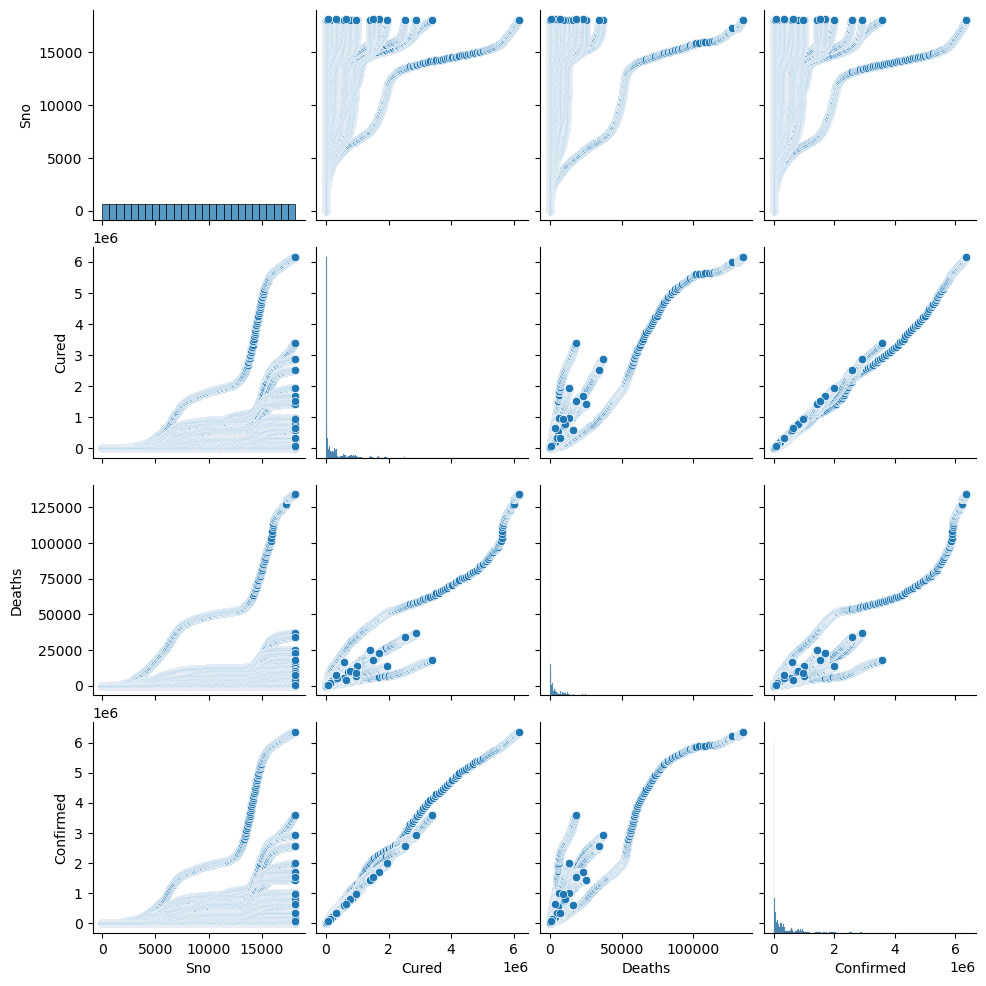

In [50]:
sns.pairplot(data)

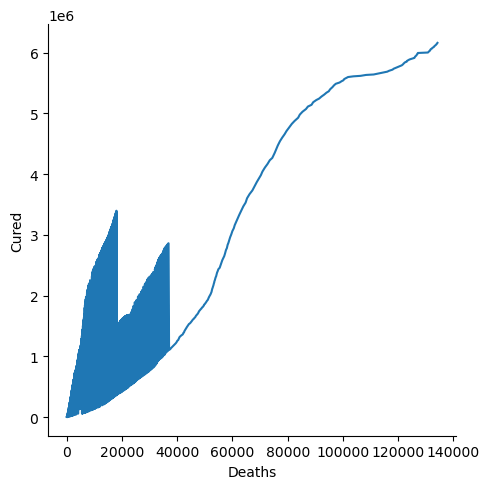

In [4]:
sns.relplot(x = 'Deaths',y = 'Cured',kind = 'line',data = data)

<AxesSubplot:ylabel='State/UnionTerritory'>

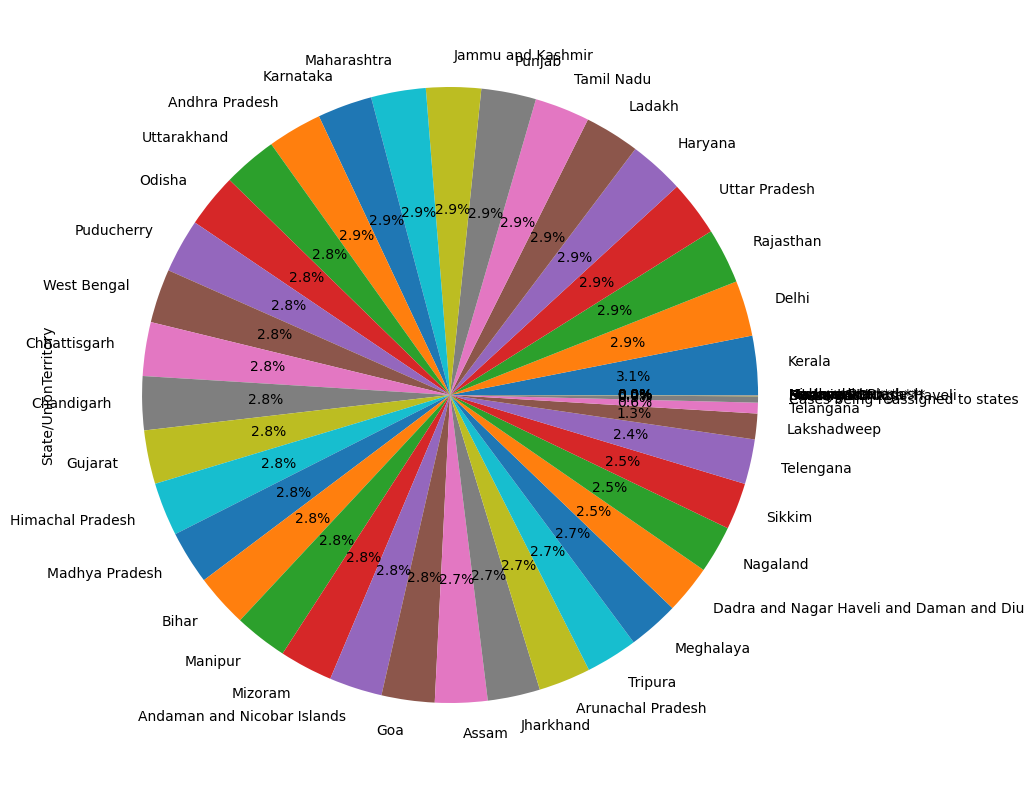

In [31]:
plt.figure(figsize=(20,10))
data["State/UnionTerritory"].value_counts().plot.pie(autopct="%1.1f%%")

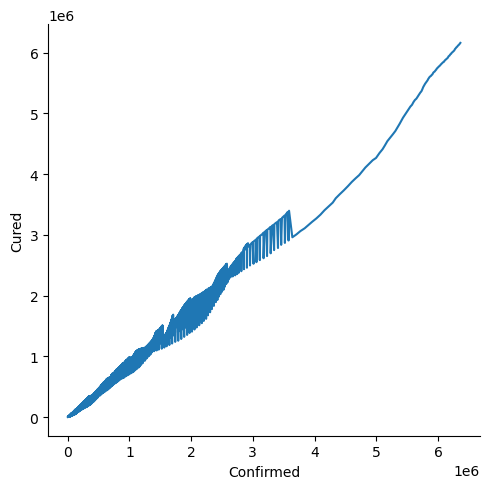

In [3]:
sns.relplot(x = 'Confirmed',y = 'Cured',kind = 'line',data = data)

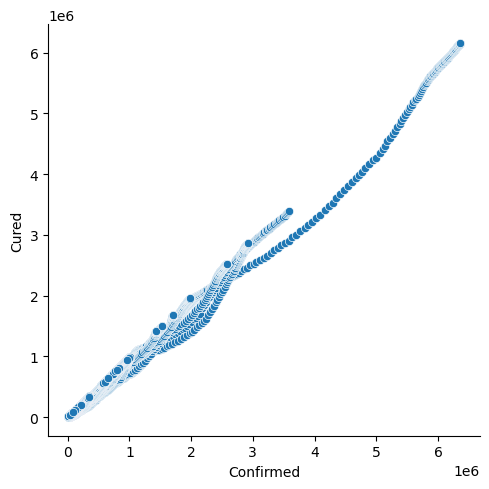

In [14]:
sns.relplot(x='Confirmed',y='Cured',data=data)

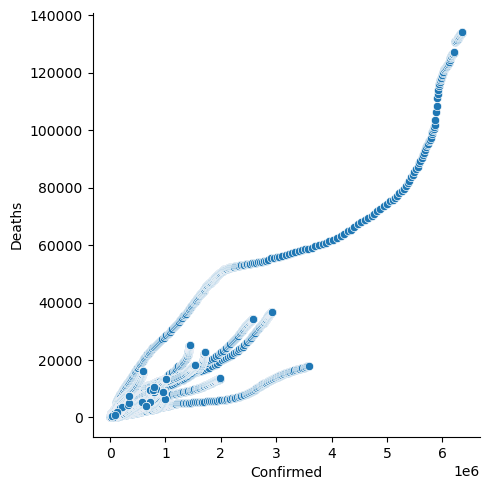

In [15]:
sns.relplot(x='Confirmed',y='Deaths',data=data)

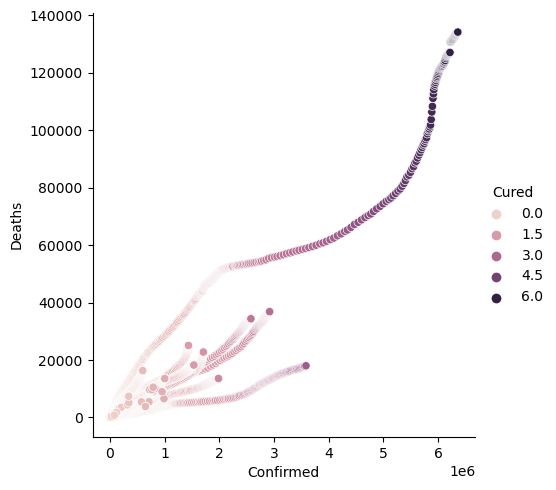

In [3]:
sns.relplot(x='Confirmed',y='Deaths',hue='Cured',data=data)

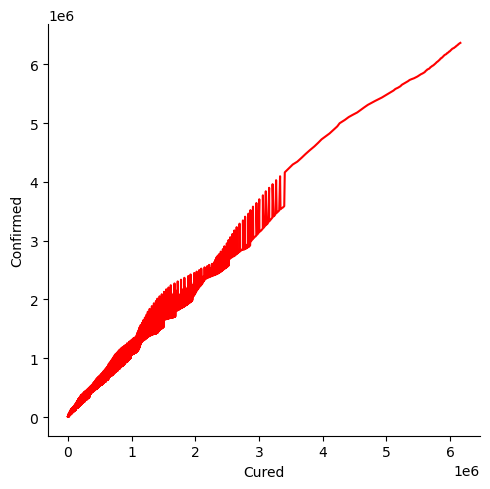

In [8]:
sns.relplot(x = 'Cured',y = 'Confirmed',kind = 'line',color = 'red', data = data)

In [ ]:
sns.catplot(x='Confirmed',y='Cured',data=data)

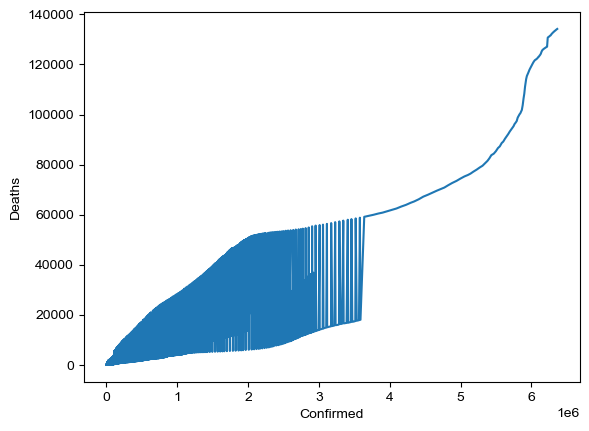

In [3]:
sns.lineplot(x="Confirmed", y="Deaths", data=data)
sns.set_style("dark")
plt.show()


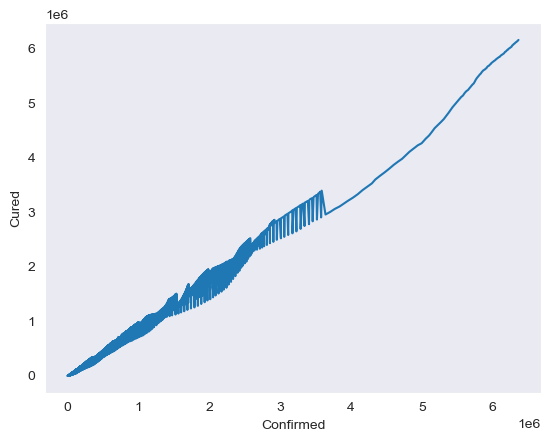

In [4]:
sns.lineplot(x="Confirmed", y="Cured", data=data)
sns.set_style("dark")
plt.show()


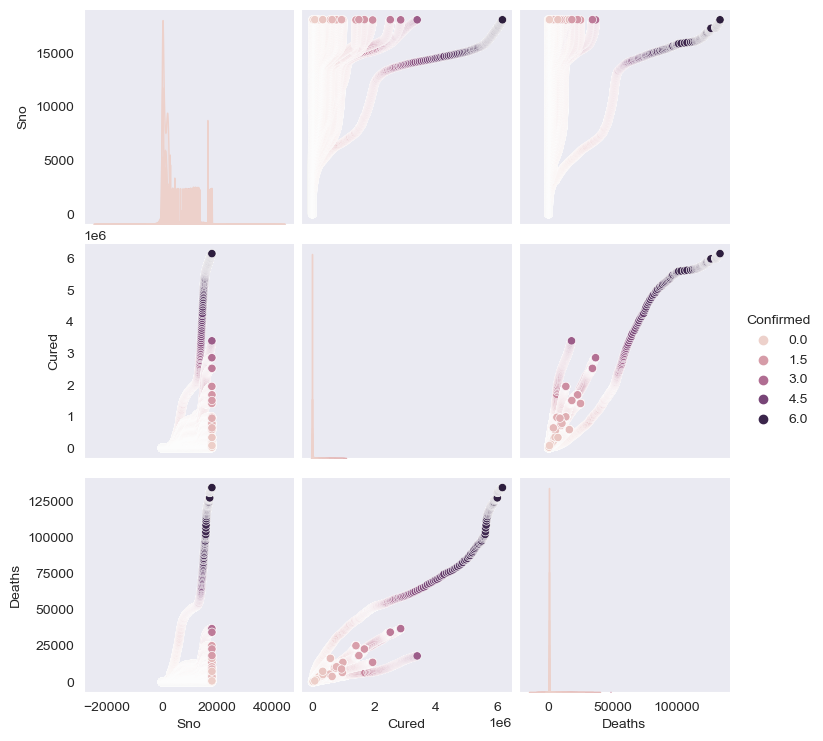

In [5]:
sns.pairplot(data=data, hue='Confirmed')
plt.show()


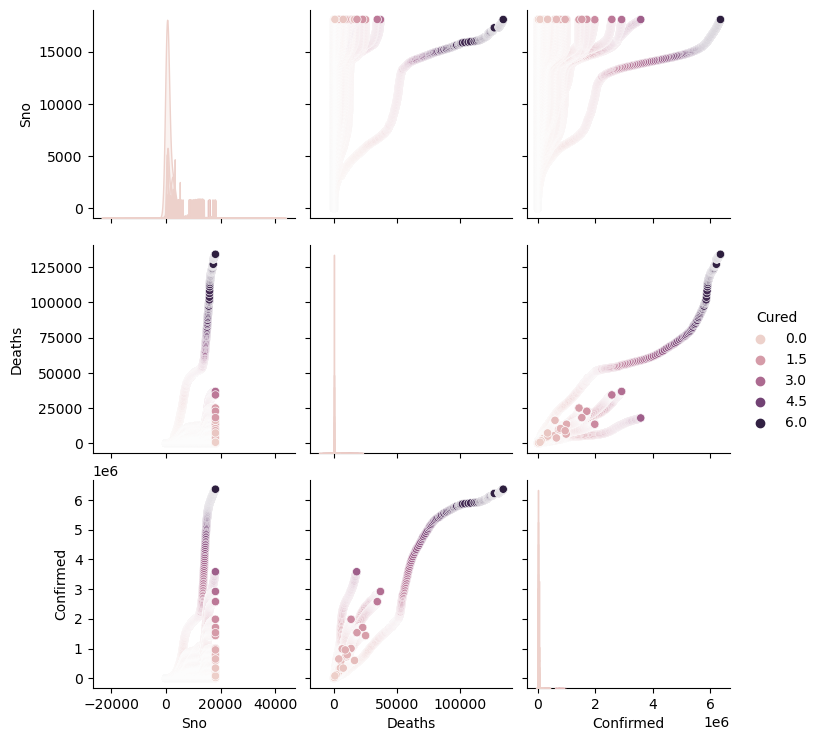

In [2]:
sns.pairplot(data=data, hue='Cured')
plt.show()

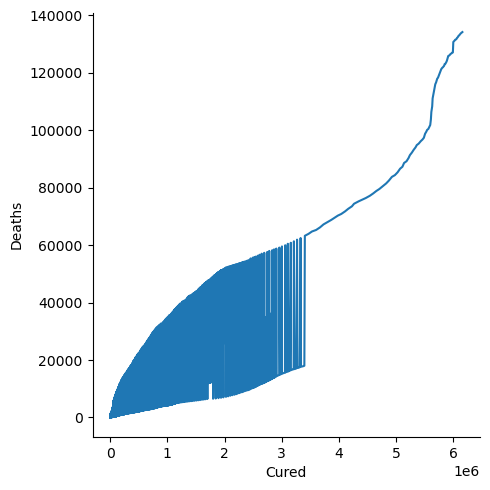

In [5]:
sns.relplot(x = 'Cured',y = 'Deaths',kind = 'line',data = data)

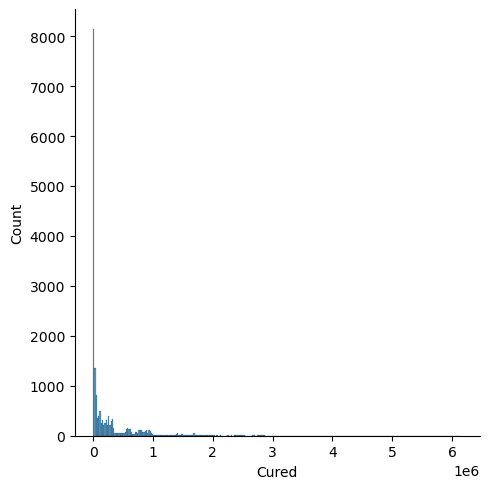

In [14]:
sns.displot(data['Cured'])
plt.show()

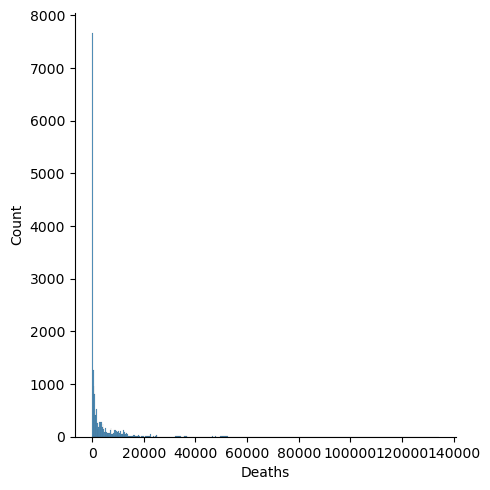

In [18]:
sns.displot(data['Deaths'])
plt.show()

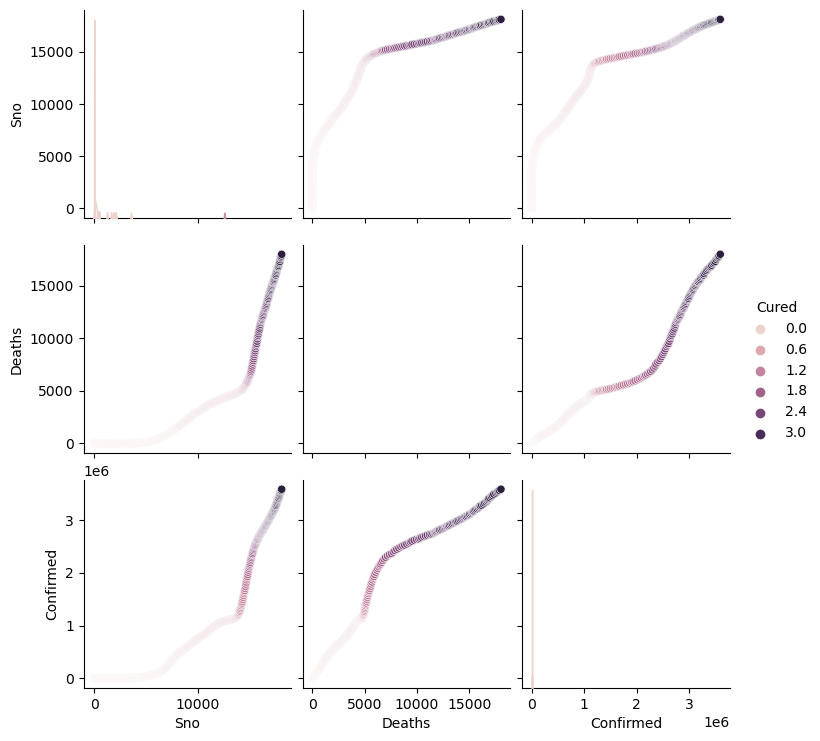

In [13]:
sns.pairplot(data=df_Kerala, hue='Cured')
plt.show()
